In [1]:
import pandas as pd
import numpy as np
import matplotlib as mltb
from matplotlib import pyplot as plt
import seaborn as sn

df = pd.read_csv('cars_raw.csv')
print(df.head())

   Year    Make            Model Used/New    Price  ConsumerRating  \
0  2019  Toyota        Sienna SE     Used  $39,998             4.6   
1  2018    Ford     F-150 Lariat     Used  $49,985             4.8   
2  2017     RAM     1500 Laramie     Used  $41,860             4.7   
3  2021   Honda  Accord Sport SE     Used  $28,500             5.0   
4  2020   Lexus           RX 350     Used  $49,000             4.8   

   ConsumerReviews SellerType  \
0               45     Dealer   
1              817     Dealer   
2              495     Dealer   
3               36     Dealer   
4               76     Dealer   

                                          SellerName  SellerRating  ...  \
0  CarMax Murrieta - Now offering Curbside Pickup...           3.3  ...   
1                                    Giant Chevrolet           4.8  ...   
2                             Gill Auto Group Madera           4.6  ...   
3                                AutoSavvy Las Vegas           4.6  ...   
4    

<AxesSubplot:>

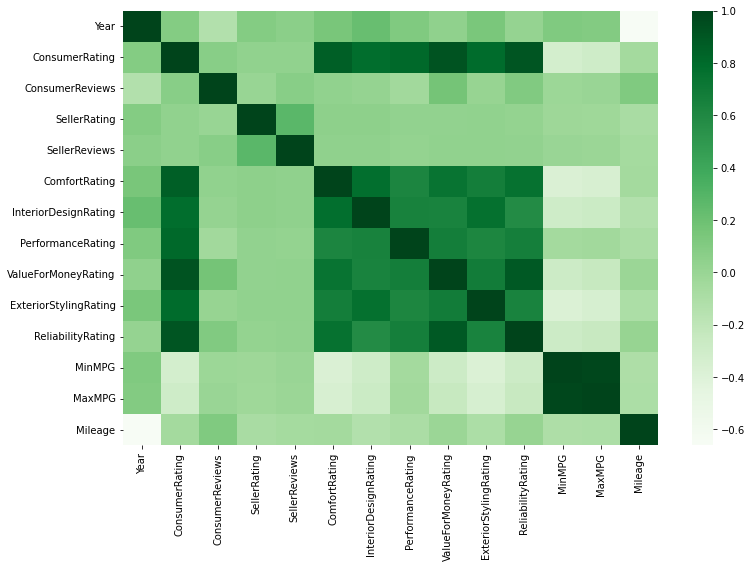

In [2]:
corr = df.corr()
plt.figure(figsize=(12,8))
sn.heatmap(corr, cmap="Greens")

Looking at the correlation chart, it seems that overall customer rating is positively correlated wtih how the customer rated indivudal aspects of the car, such as reliability, value for money, and comfort as seen here.

Conversly, it seems that as the MPG is negatively correlated with these values, which is interesting because usually MPG is a desired quality, but as shown in the data, as the MPG goes up, the customer ratings go down.

In [7]:
df[['Year','Make','Price']]
df[df['Price'].str.contains('Not Priced') == False]
for col in df.columns[1:]:
    df['Price'] = pd.to_numeric(df['Price'].str.replace('[^-.0-9]', ''))


AttributeError: Can only use .str accessor with string values!

In [56]:
mean_price_df = (df.groupby(['Make']).mean())
mean_price_df.sort_values(by='Price', ascending = True, inplace=True)
print(mean_price_df)


                      Year          Price  ConsumerRating  ConsumerReviews  \
Make                                                                         
Mercury        2010.500000    6987.500000        4.300000        18.500000   
Scion          2012.000000    7990.250000        4.425000        17.750000   
Saturn         2009.000000    9868.000000        4.500000        22.000000   
FIAT           2014.000000    9900.000000        4.300000       104.000000   
Mitsubishi     2018.550000   20802.050000        4.775000        25.450000   
MINI           2016.600000   21625.800000        4.740000        24.800000   
Chrysler       2017.564103   26221.923077        4.746154        76.589744   
Nissan         2018.617530   26978.677291        4.727888       139.382470   
Buick          2018.464912   27255.438596        4.714035       115.140351   
Mazda          2018.751220   28565.156098        4.813171       143.541463   
Hyundai        2019.179245   29299.990566        4.741509       

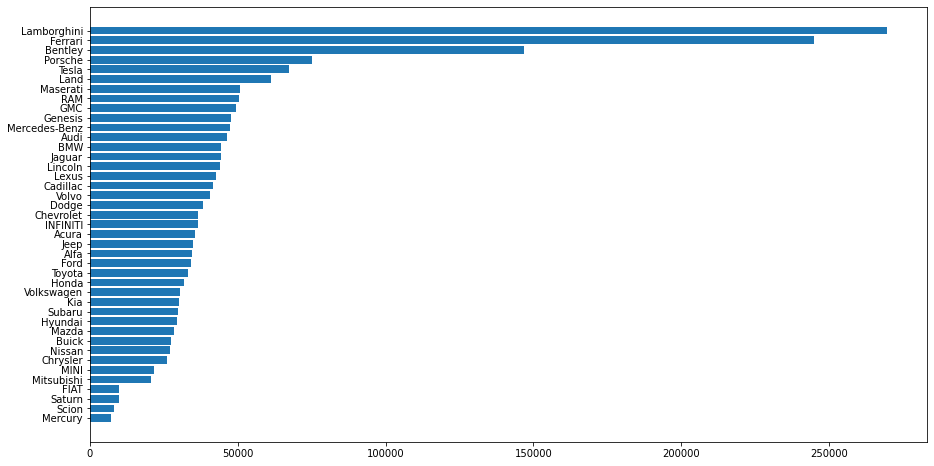

In [57]:
plt.figure(figsize=(15,8))
plt.barh(y=mean_price_df.index, width=mean_price_df['Price'])
plt.show()

Here, sports cars brand such as Lamborghini and Ferrari are on average sold at a much higher price exceeding $250,000, while a majority of other car brands hover around $50,000.

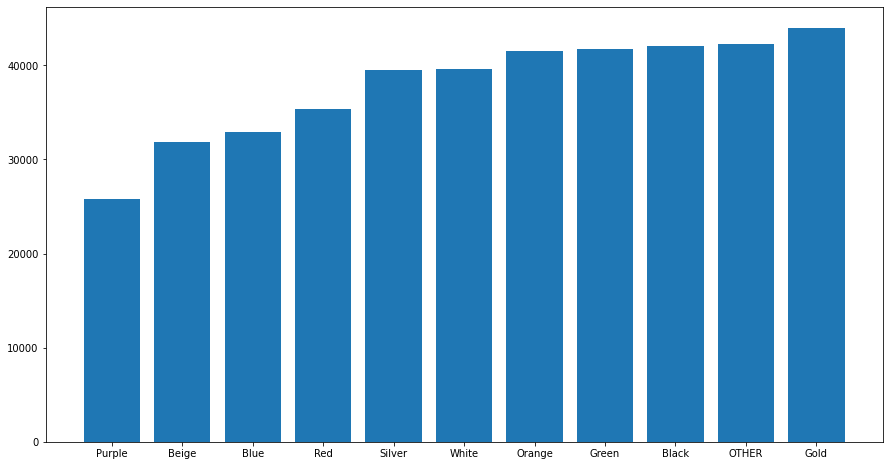

In [126]:
import re

mean_colors_df = df[['ExteriorColor', 'Price']]
mean_colors_df.loc[df['ExteriorColor'].str.contains('Black|BLACK|BL|Charcoal|Smoke|Matte|Nocturnal'), 'ExteriorColor'] = 'Black' 
mean_colors_df.loc[df['ExteriorColor'].str.contains('Red|Velvet|VELVET|Ruby|Crimson|Cherry|Raspberry'), 'ExteriorColor'] = 'Red' 
mean_colors_df.loc[df['ExteriorColor'].str.contains('Orange|Borealis'), 'ExteriorColor'] = 'Orange' 
mean_colors_df.loc[df['ExteriorColor'].str.contains('Green|Lime|Jade'), 'ExteriorColor'] = 'Green' 
mean_colors_df.loc[df['ExteriorColor'].str.contains('Yellow|Gold'), 'ExteriorColor'] = 'Gold' 
mean_colors_df.loc[df['ExteriorColor'].str.contains('Blue|Aqua|Aruba'), 'ExteriorColor'] = 'Blue' 
mean_colors_df.loc[df['ExteriorColor'].str.contains('Purple'), 'ExteriorColor'] = 'Purple' 
mean_colors_df.loc[df['ExteriorColor'].str.contains('White|Pearl|PEARL|WHITE|Absolute Zero|Arctic Ice|Frostbite|Chalk|Cream'),'ExteriorColor'] = 'White' 
mean_colors_df.loc[df['ExteriorColor'].str.contains('Brown|Autumn|Beige|Baja Storm|Bianco|Sand|Bronze'), 'ExteriorColor'] = 'Beige' 
mean_colors_df.loc[df['ExteriorColor'].str.contains('Gray|Metallic|Silver|Platinum|Anvil|Graphite|Billet|Grey|Linx|Stone|GRAY|GREY|Steel'), 'ExteriorColor'] = 'Silver' 
mean_colors_df.loc[~mean_colors_df['ExteriorColor'].str.contains('Black|Red|Orange|Green|Gold|Blue|Purple|White|Beige|Silver'), 'ExteriorColor'] = 'OTHER'


mean_colors_df = mean_colors_df.groupby(['ExteriorColor']).mean().sort_values(by='Price', ascending=True)

plt.figure(figsize=(15,8))
plt.bar(x=mean_colors_df.index, height=mean_colors_df['Price'])
plt.show()




In [184]:
history_df = df.groupby(['Year', 'Make']).size()
history_df
#his_columns = (history_df.index.get_level_values(level='Year').drop_duplicates())
#his_rows = (history_df.index.get_level_values(level='Make').drop_duplicates())

#history_df2 = pd.DataFrame(columns = his_columns)
#for row in history_df:
#  if (history_df.index.levels[1] in history_df2.index):
#    history_df2.at[history_df.index.levels[1],history_df.index.levels[0]] = history_df[row]
#  else:
#    history_df2.append(history_df.index.levels[1])
#    history_df2.at[history_df.index.levels[1],history_df.index.levels[0]] = history_df[row]

Year  Make         
2001  Mercedes-Benz     1
2002  BMW               1
2003  Acura             1
      Ford              2
      Lexus             2
                       ..
2022  Subaru            1
      Tesla             7
      Toyota           11
      Volkswagen        2
      Volvo             2
Length: 392, dtype: int64

I was able to get the frequency of each car by year and make, but I couldn't figure out how to iterate through the indexes. I wanted to plot the sales per each car brand according to each year as visualization, but I didn't know how to do it. 